In [15]:
import pandas as pd
import numpy as np

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({
    'font.size': 20.0,
    'axes.titlesize': 'small',
    'axes.labelsize': 'small',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small'
})

In [33]:
import folium

In [34]:
county_consumption = pd.read_csv('./data/county_consumption.csv')
county_consumption['fips'] = county_consumption['fips'].astype(str)

folium_map = folium.Map(location=[41.95, -93.5], zoom_start=7)

folium_map.choropleth(
    geo_data=r'./data/county_geography.json',
    data=county_consumption,
    columns=['fips', 'county_consumption'],
    key_on='feature.id',
    fill_color='PuRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Sales (Millions of Liters)',
)
folium_map.save('./img/county_consumption_choropleth_map.html')

In [35]:
df = pd.read_csv('./data/aggregated_data.csv')
df['Month'] = pd.to_datetime(df['Month'])
df['DemandPctChange'] = df['Demand'].pct_change()
df['LogDemand'] = np.log(df['Demand'])
df['LogDemandDiff'] = df['LogDemand'].diff()
df['PricePctChange'] = df['Price'].pct_change()
df['LogPrice'] = np.log(df['Price'])
df['LogPriceDiff'] = df['LogPrice'].diff()

Month = pd.to_datetime(df['Month']).values
Demand = pd.Series(df['Demand']).values
Price = pd.Series(df['Price']).values
DemandPctChange = pd.Series(df['DemandPctChange']).values
LogDemandDiff = pd.Series(df['LogDemandDiff']).values
PricePctChange = pd.Series(df['PricePctChange']).values
LogPriceDiff = pd.Series(df['LogPriceDiff']).values
LogDemand = pd.Series(df['LogDemand']).values
LogPrice = pd.Series(df['LogPrice']).values

DemandPctChange[0] = 0
LogDemandDiff[0] = 0
PricePctChange[0] = 0
LogPriceDiff[0] = 0

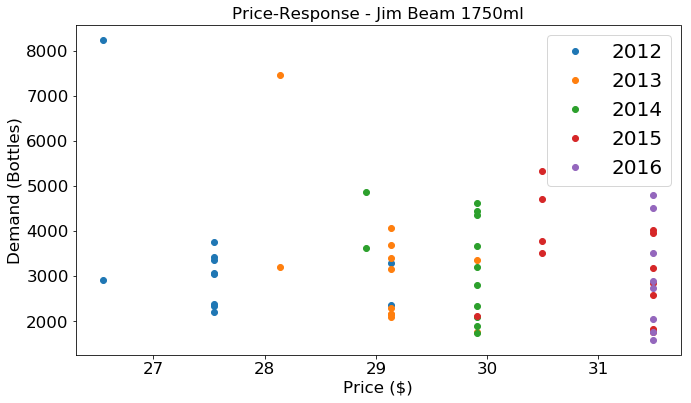

In [36]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(Price[0:12],Demand[0:12],'o',
        Price[12:24],Demand[12:24],'o',
        Price[24:36],Demand[24:36],'o',
        Price[36:48],Demand[36:48],'o',
        Price[48:],Demand[48:],'o');
ax.set_title('Price-Response - Jim Beam 1750ml')  
ax.set_xlabel('Price ($)')
ax.set_ylabel('Demand (Bottles)')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=1)
fig.tight_layout()
fig.savefig('./img/price_response.png')

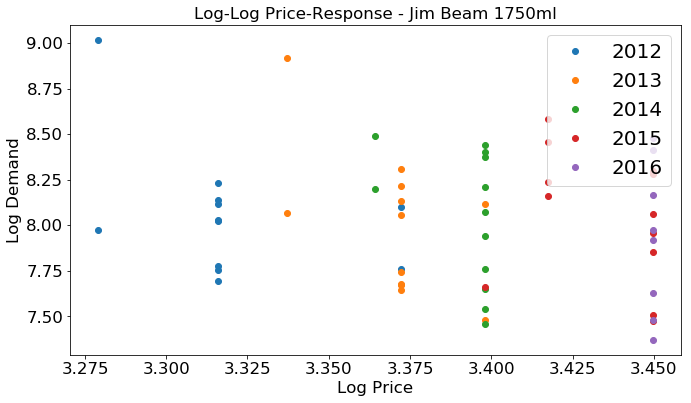

In [37]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(LogPrice[0:12],LogDemand[0:12],'o',
        LogPrice[12:24],LogDemand[12:24],'o',
        LogPrice[24:36],LogDemand[24:36],'o',
        LogPrice[36:48],LogDemand[36:48],'o',
        LogPrice[48:],LogDemand[48:],'o');
ax.set_title('Log-Log Price-Response - Jim Beam 1750ml')  
ax.set_xlabel('Log Price')
ax.set_ylabel('Log Demand')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=1)
fig.tight_layout()
fig.savefig('./img/log_log_price_response.png')

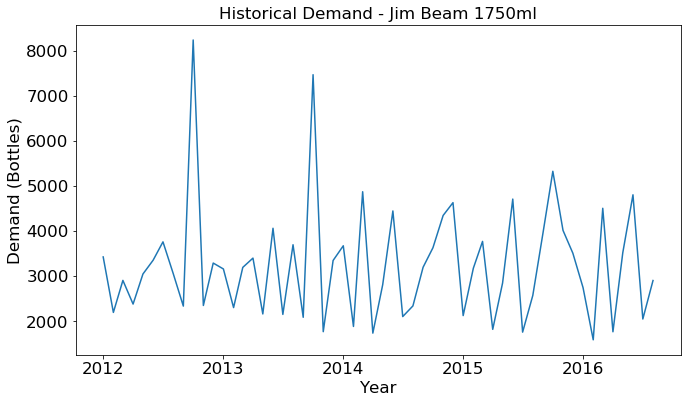

In [39]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(Month, Demand);
ax.set_title('Historical Demand - Jim Beam 1750ml')  
ax.set_ylabel('Demand (Bottles)')
ax.set_xlabel('Year')
fig.tight_layout()
fig.savefig('./img/historical_demand.png')

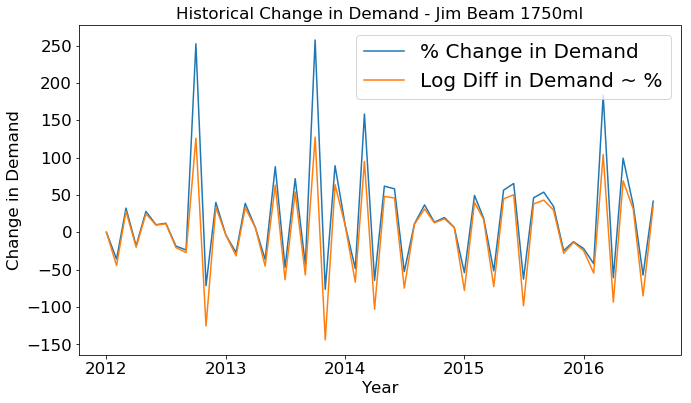

In [40]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(Month, DemandPctChange*100, '-',
           Month, LogDemandDiff*100, '-');
ax.set_title('Historical Change in Demand - Jim Beam 1750ml')  
ax.set_ylabel('Change in Demand')
ax.set_xlabel('Year')
ax.legend(['% Change in Demand', 'Log Diff in Demand ~ %'], loc=1)
fig.tight_layout()
fig.savefig('./img/historical_change_in_demand.png')

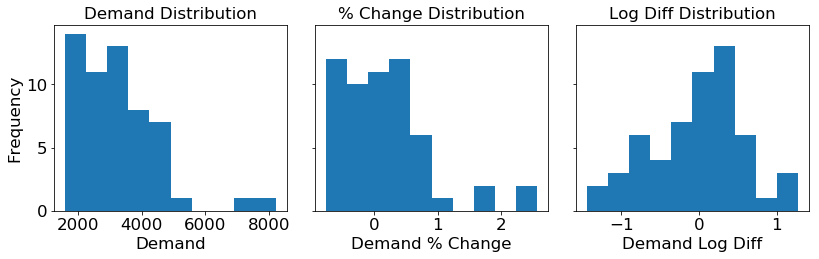

In [41]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
ax[0].hist(Demand)
ax[0].set_title('Demand Distribution') 
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Demand')
ax[1].hist(DemandPctChange)
ax[1].set_title('% Change Distribution') 
ax[1].set_xlabel('Demand % Change')
ax[2].hist(LogDemandDiff)
ax[2].set_title('Log Diff Distribution') 
ax[2].set_xlabel('Demand Log Diff')
fig.tight_layout()
fig.savefig('./img/demand_hist.png')

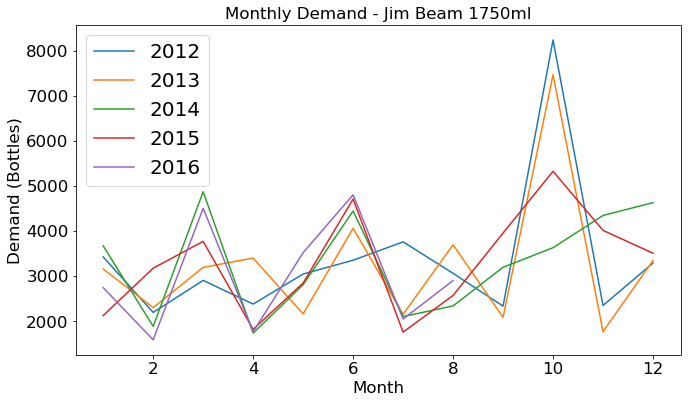

In [42]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot([i for i in range(1,13)],Demand[0:12],'-',
           [i for i in range(1,13)],Demand[12:24],'-',
           [i for i in range(1,13)],Demand[24:36],'-',
           [i for i in range(1,13)],Demand[36:48],'-',
           [i for i in range(1,9)],Demand[48:],'-');
ax.set_title('Monthly Demand - Jim Beam 1750ml')  
ax.set_ylabel('Demand (Bottles)')
ax.set_xlabel('Month')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=2)
fig.tight_layout()
fig.savefig('./img/monthly_demand.png')

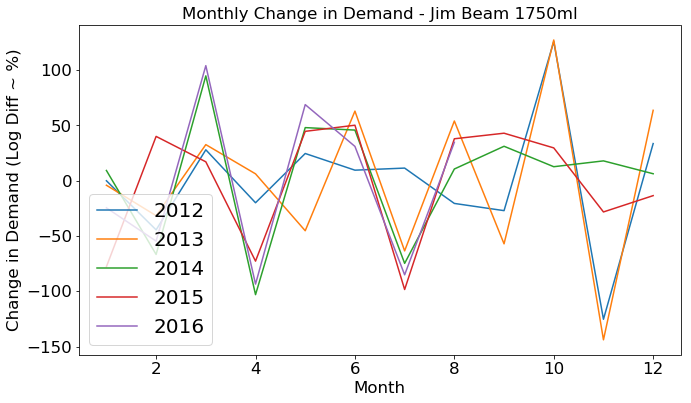

In [43]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot([i for i in range(1,13)],LogDemandDiff[0:12]*100,'-',
           [i for i in range(1,13)],LogDemandDiff[12:24]*100,'-',
           [i for i in range(1,13)],LogDemandDiff[24:36]*100,'-',
           [i for i in range(1,13)],LogDemandDiff[36:48]*100,'-',
           [i for i in range(1,9)],LogDemandDiff[48:]*100,'-');
ax.set_title('Monthly Change in Demand - Jim Beam 1750ml')  
ax.set_ylabel('Change in Demand (Log Diff ~ %)')
ax.set_xlabel('Month')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=3)
fig.tight_layout()
fig.savefig('./img/monthly_change_in_demand.png')

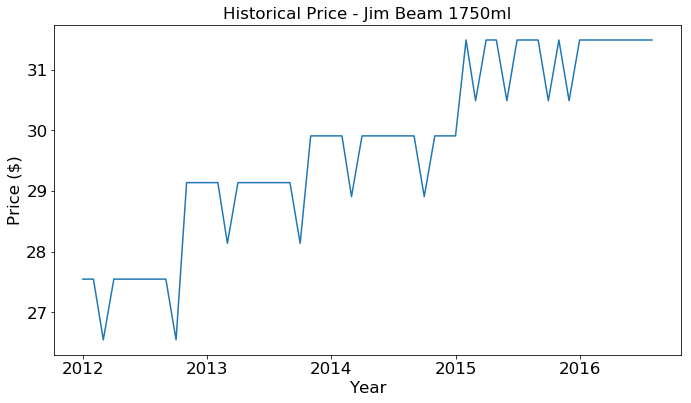

In [44]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(Month, Price);
ax.set_title('Historical Price - Jim Beam 1750ml')  
ax.set_ylabel('Price ($)')
ax.set_xlabel('Year')
fig.tight_layout()
fig.savefig('./img/historical_price.png')

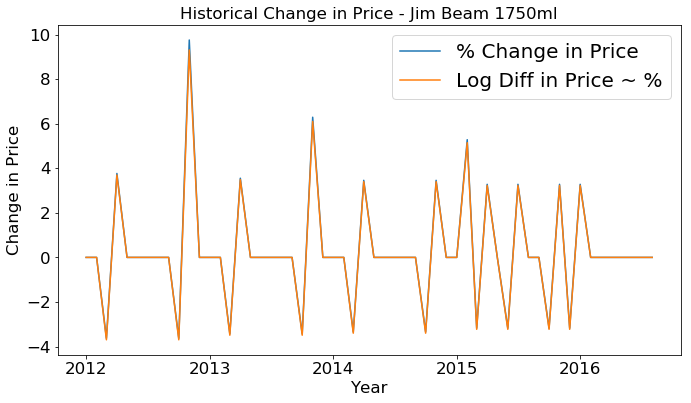

In [45]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot(Month, PricePctChange*100, '-',
           Month, LogPriceDiff*100, '-');
ax.set_title('Historical Change in Price - Jim Beam 1750ml')  
ax.set_ylabel('Change in Price')
ax.set_xlabel('Year')
ax.legend(['% Change in Price', 'Log Diff in Price ~ %'], loc=1)
fig.tight_layout()
fig.savefig('./img/historical_change_in_price.png')

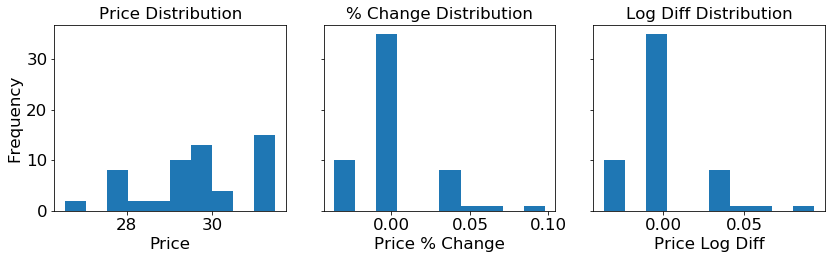

In [46]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
ax[0].hist(Price)
ax[0].set_title('Price Distribution') 
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Price')
ax[1].hist(PricePctChange)
ax[1].set_title('% Change Distribution') 
ax[1].set_xlabel('Price % Change')
ax[2].hist(LogPriceDiff)
ax[2].set_title('Log Diff Distribution') 
ax[2].set_xlabel('Price Log Diff')
fig.tight_layout()
fig.savefig('./img/price_hist.png')

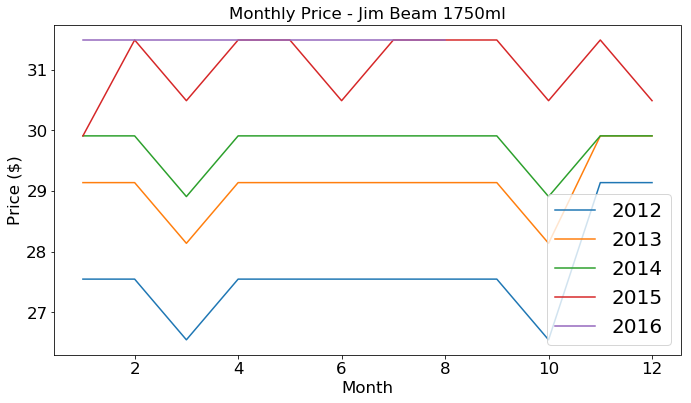

In [47]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot([i for i in range(1,13)],Price[0:12],'-',
           [i for i in range(1,13)],Price[12:24],'-',
           [i for i in range(1,13)],Price[24:36],'-',
           [i for i in range(1,13)],Price[36:48],'-',
           [i for i in range(1,9)],Price[48:56],'-');
ax.set_title('Monthly Price - Jim Beam 1750ml')  
ax.set_ylabel('Price ($)')
ax.set_xlabel('Month')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=4)
fig.tight_layout()
fig.savefig('./img/monthly_price.png')

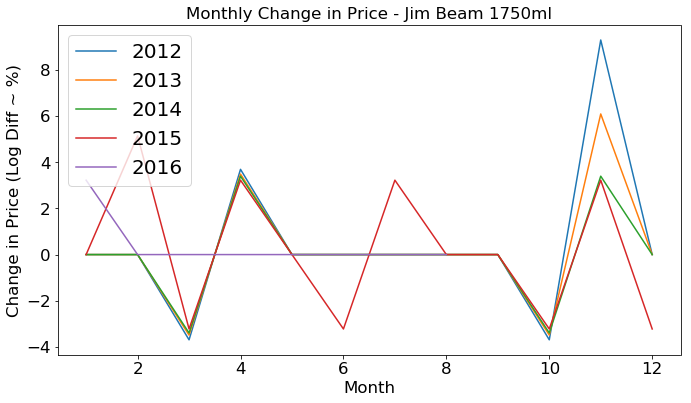

In [48]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))
ax.plot([i for i in range(1,13)],LogPriceDiff[0:12]*100,'-',
           [i for i in range(1,13)],LogPriceDiff[12:24]*100,'-',
           [i for i in range(1,13)],LogPriceDiff[24:36]*100,'-',
           [i for i in range(1,13)],LogPriceDiff[36:48]*100,'-',
           [i for i in range(1,9)],LogPriceDiff[48:56]*100,'-');
ax.set_title('Monthly Change in Price - Jim Beam 1750ml')
ax.set_ylabel('Change in Price (Log Diff ~ %)')
ax.set_xlabel('Month')
ax.legend(['2012', '2013', '2014', '2015', '2016'], loc=2)
fig.tight_layout()
fig.savefig('./img/monthly_change_in_price.png')